In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from utils import classification_evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)


#### I have chosen to use the dataset 2

In [2]:
dataframe = pd.read_csv("../data/cleaned_dataset_2.csv")


In [3]:
dataframe.head()


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,1,20228,140,90,3,1,0,0,1,1,55,34.927679,1
1,2,18857,130,70,3,1,0,0,0,1,52,23.507805,1
2,4,17474,100,60,1,1,0,0,0,0,48,23.011177,1
3,9,22113,130,80,3,1,0,0,1,0,61,37.729725,1
4,12,22584,130,90,3,3,0,0,1,1,62,29.983588,0


In [4]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)


In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((31712, 12), (13592, 12), (31712,), (13592,))

In [6]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(
    X_train, y_train, test_size=0.2
)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape


((25369, 12), (6343, 12), (25369,), (6343,))

In [7]:
scaler = StandardScaler()

vote_classifier = VotingClassifier(
    [
        ("dt", DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)),
        ("svc", LinearSVC(C=1, dual=False, max_iter=100000, penalty="l1")),
        (
            "lr",
            LogisticRegression(
                class_weight="balanced",
                l1_ratio=0.6326530612244897,
                max_iter=10000,
                multi_class="ovr",
                penalty="elasticnet",
                solver="saga",
            ),
        ),
    ],
    voting="hard",
)


In [8]:
vote_classifier.fit(X_train_for_val, y_train_for_val)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=2)),
                             ('svc',
                              LinearSVC(C=1, dual=False, max_iter=100000,
                                        penalty='l1')),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 l1_ratio=0.6326530612244897,
                                                 max_iter=10000,
                                                 multi_class='ovr',
                                                 penalty='elasticnet',
                                                 solver='saga'))])

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      3186
           1       0.77      0.63      0.69      3157

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



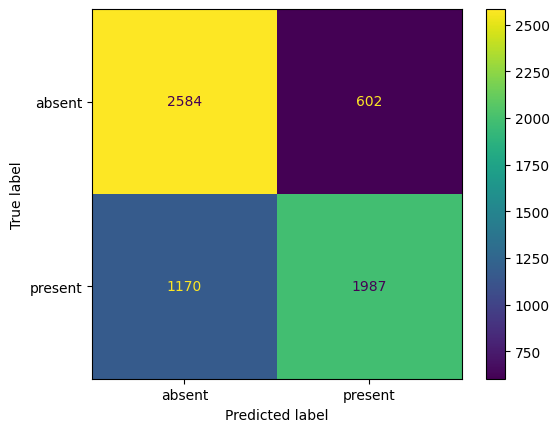

In [9]:
classification_evaluation(x_test=X_val,y_test= y_val,model= vote_classifier)


In [10]:
vote_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=2)),
                             ('svc',
                              LinearSVC(C=1, dual=False, max_iter=100000,
                                        penalty='l1')),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 l1_ratio=0.6326530612244897,
                                                 max_iter=10000,
                                                 multi_class='ovr',
                                                 penalty='elasticnet',
                                                 solver='saga'))])

In [12]:
ypred = vote_classifier.predict(X_test)

In [15]:
ypred[:10], y_test[:10].to_list(),

(array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1]), [0, 0, 1, 1, 1, 0, 1, 0, 1, 0])